### read file

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('dfsNotInUseAnymore/nodes.json')

In [3]:
df.shape

(3428, 3)

In [4]:
df["type"].unique ()

array(['company', 'organization', None, 'person', 'location',
       'political_organization', 'vessel', 'movement', 'event'],
      dtype=object)

### check how many empty type

In [5]:
dfNoNullType = df.dropna(subset=['type'])

In [6]:
df.size, dfNoNullType.size

(10284, 8469)

In [7]:
df.size-dfNoNullType.size

1815

In [8]:
dfNoNullType.to_json ("nodesNoNullType.json", orient="records", indent=4)

### check how many empty country

In [20]:
dfNoNullCountry = df.dropna(subset=['country'])
print(df.size, dfNoNullCountry.size)
print (df.size-dfNoNullCountry.size)
dfNoNullCountry.to_json ("dfNoNullCountry.json", orient="records", indent=4)


10284 3336
6948


### check duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
for col in df.columns:
    print(f"{col}: {df[col].value_counts()}\n")

type: type
person                    1022
organization               987
location                   393
political_organization     121
vessel                     115
company                     90
event                       74
movement                    21
Name: count, dtype: int64

country: country
Country_271835    870
Oceanus            42
Marebak            14
Nalakond            6
Country_789455      6
                 ... 
Country_984172      1
Country_193919      1
Country_928409      1
Country_615819      1
Country_286580      1
Name: count, Length: 117, dtype: int64

id: id
77                2
23                2
90                2
98                2
621               2
                 ..
860067396         1
664738735         1
290834957         1
Timothy Reeves    1
341411            1
Name: count, Length: 3417, dtype: int64



there are duplicate ids

In [11]:
duplicated_ids = dfNoNullType[dfNoNullType.duplicated('id', keep=False)]

In [12]:
duplicated_ids["id"].value_counts().keys()

Index(['77', '18', '23', '621', '626', '90', '38'], dtype='object', name='id')

In [13]:
duplicated_ids = duplicated_ids.sort_values(by=['id', 'type'])
duplicated_ids

,type,country,id
966,organization,None,18
226,vessel,None,18
250,organization,None,23
2772,vessel,None,23
1296,movement,None,38
1170,organization,None,38
572,political_organization,None,621
979,vessel,None,621
2340,political_organization,None,626
937,vessel,None,626


In [14]:
duplicated_ids.to_csv("temp.csv", index=False)

at first glance vessel seems to be the most common type in the type duplicates dataset

therefore, in the beginning i tought to remove the instances where type is 'vessel' because it seemed to me as a wrong record of the data.

C:\Users\alex1\AppData\Local\Temp\ipykernel_30152\2600206135.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, counts[i], str(counts[i]), ha='center', va='bottom')


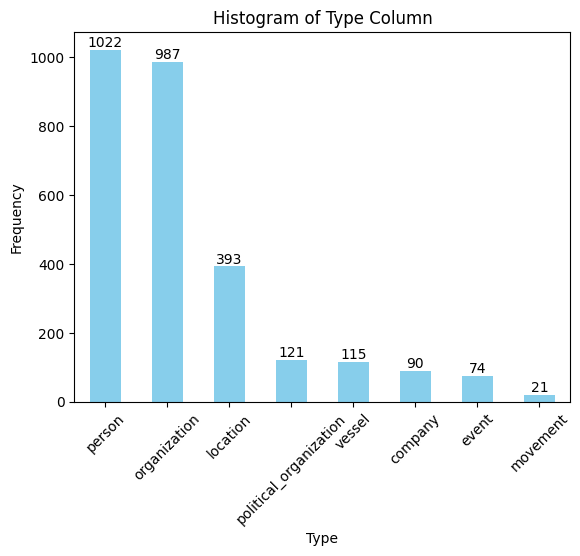

In [15]:
import matplotlib.pyplot as plt
# Count occurrences and plot
counts = dfNoNullType['type'].value_counts()
ax = counts.plot(kind='bar', color='skyblue')

# Add exact numbers on the bars
for i in range(len(counts)):
    ax.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.title('Histogram of Type Column')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

after plotting the quantities of each type, one can observe that the vessel class is not one of the most commons

therefore i decided to remove the instances that are the least common as a type from the dataset

so for example in the cases of :

966	organization	None	18

226	vessel	None	18

since organization is present 987 times into the dataset and vessel is present 115 times the instance of type vessel will be stored in the new dataset

and 

1296	movement	None	38

1170	organization	None	38

since organization is present 987 times into the dataset and movement is present 21 times the instance of type movement will be stored in the new dataset


In [16]:
countsDict = dict(counts)

recordsToRemove = duplicated_ids.copy()
recordsToRemove['count'] = recordsToRemove['type'].map(countsDict)

# Remove duplicates based on id, keeping the one with the highest count
recordsToRemove = recordsToRemove.loc[recordsToRemove.groupby('id')['count'].idxmax()]

# Drop the count column if you no longer need it
recordsToRemove = recordsToRemove.drop(columns=['count'])

indexesOfRecordsToRemove = recordsToRemove.index
indexesOfRecordsToRemove

Index([966, 250, 1170, 572, 2340, 1693, 1085], dtype='int64')

In [17]:
dfNoNullTypeNoDuplicateIds = dfNoNullType.drop(indexesOfRecordsToRemove)
dfNoNullType.size, dfNoNullTypeNoDuplicateIds.size

(8469, 8448)

In [18]:
dfNoNullTypeNoDuplicateIds.to_json("nodesNoNullTypeNoDuplicateIds.json", orient="records", indent=4)